<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!curl -L "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv" -o insurance_data.csv
data = pd.read_csv("insurance_data.csv")
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   155  100   155    0     0    756      0 --:--:-- --:--:-- --:--:--   756


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


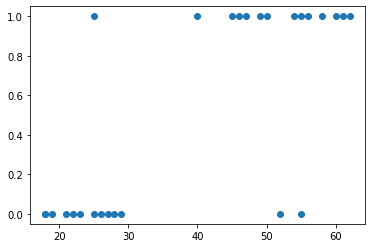

In [21]:
plt.scatter(data.age, data.bought_insurance)

In [106]:
def sigmoid(x) -> float:
    return 1/(1 + np.exp(-x))
  
class LogisticRegression:
  def __init__(self, learning_rate=0.001, num_iter=1000):
    self.w = None
    self.b = None
    self.learning_rate = learning_rate
    self.num_iter = num_iter

  def fit(self, X,Y):
    n_samples,n_features   =X.shape
    self.w = np.zeros(n_features)
    self.b = 0
    for _ in range(self.num_iter):
      linear_pred = np.dot(X, self.w) + self.b
      predictions = sigmoid(linear_pred)
      dw = (1/n_samples) * np.dot(X.T, (predictions - Y))
      db = (1/n_samples) * np.sum((predictions - Y))

      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  def plot_sigmoid(self):
    x_vals = np.linspace(-3,3,100)
    plt.plot(x_vals, np.array([sigmoid(x) for x in x_vals]))

  def predict(self, X):
    linear_pred = np.dot(X, self.w) + self.b
    predictions = sigmoid(linear_pred)
    return [0 if y <= 0.5 else 1 for y in predictions]  

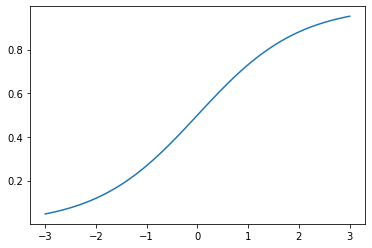

In [107]:
clf = LogisticRegression()
clf.plot_sigmoid()